In [1]:
import numpy as np
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.disable_v2_behavior()
from PIL import Image



In [2]:
cach_dir="C:/Users/mic/.keras/datasets"
train_url="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(train_url.split('/')[-1], train_url, cach_dir)

iris=pd.read_csv(train_path)
irisNp = np.array(iris)
irisTf=tf.convert_to_tensor(irisNp)
irisTf.shape

gpus=tf.config.experimental.list_physical_devices('gpu')
gpus

[]

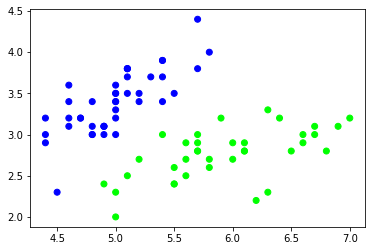

(78, 1)
tf.Tensor(
[[1.  5.  2.3]
 [1.  4.9 3.1]
 [1.  5.7 3.8]
 [1.  4.4 3.2]
 [1.  5.4 3.4]
 [1.  6.7 3.1]
 [1.  5.1 3.7]
 [1.  5.2 2.7]
 [1.  6.9 3.1]
 [1.  5.8 4. ]
 [1.  5.4 3.9]
 [1.  6.3 3.3]
 [1.  5.7 4.4]
 [1.  5.4 3.9]
 [1.  5.2 3.5]
 [1.  5.8 2.6]
 [1.  5.4 3. ]
 [1.  6.7 3. ]
 [1.  6.3 2.3]
 [1.  5.1 2.5]
 [1.  6.4 3.2]
 [1.  5.1 3.8]
 [1.  4.8 3. ]
 [1.  5.1 3.8]
 [1.  4.7 3.2]
 [1.  4.8 3.4]
 [1.  4.6 3.6]
 [1.  5.  3.3]
 [1.  6.6 3. ]
 [1.  6.1 2.8]
 [1.  5.  3.2]
 [1.  7.  3.2]
 [1.  5.  2. ]
 [1.  5.6 2.5]
 [1.  6.2 2.2]
 [1.  4.4 3. ]
 [1.  5.  3.4]
 [1.  4.7 3.2]
 [1.  6.6 2.9]
 [1.  5.5 3.5]
 [1.  4.9 3.1]
 [1.  5.5 2.4]
 [1.  5.7 2.9]
 [1.  6.  2.9]
 [1.  5.4 3.7]
 [1.  6.1 2.9]
 [1.  6.5 2.8]
 [1.  5.6 2.7]
 [1.  4.9 3.1]
 [1.  6.8 2.8]
 [1.  5.7 2.8]
 [1.  6.  2.7]
 [1.  5.  3.5]
 [1.  6.1 2.8]
 [1.  5.1 3.5]
 [1.  4.6 3.1]
 [1.  4.6 3.4]
 [1.  4.6 3.2]
 [1.  5.9 3.2]
 [1.  5.1 3.8]
 [1.  4.9 3. ]
 [1.  4.9 2.4]
 [1.  4.5 2.3]
 [1.  5.8 2.7]
 [1.  5.  3.4]
 [1.  

In [3]:
train_x=irisNp[:,0:2]
train_y=irisNp[:,4]
train_x=train_x[train_y < 2]
train_y=train_y[train_y < 2]
num = len(train_y)
train_x.shape,train_y.shape,num
plt.scatter(train_x[:,0],train_x[:,1], c=train_y, cmap='brg' )
plt.show()

X0=np.ones(num).reshape(-1,1)
#print(num)
print(X0.shape)
X=tf.cast( tf.concat((X0,train_x),axis=1), tf.float32)
print(X)
Y=tf.cast( train_y.reshape(-1,1), tf.float32)
print(Y)


In [4]:
ce=[]
acc=[]
itr=3000
learn_rate=0.01
np.random.seed(62)
W=tf.Variable(np.random.randn(3,1),dtype=tf.float32)

for i in range(itr+1):
    with tf.GradientTape() as tape:
        PRED=1/(1+tf.exp(-tf.matmul(X,W)))
        LOSS=-tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
    accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED.numpy()<0.5,0.,1.),Y),tf.float32))
    ce.append(LOSS)
    acc.append(accuracy)

    dL_dW=tape.gradient(LOSS,W)
    W.assign_sub(learn_rate*dL_dW)

    print("<%d>:Loss: %f, ACC:%f" %(i,LOSS,accuracy))

<0>:Loss: 1.840436, ACC:0.538462
<1>:Loss: 1.756242, ACC:0.538462
<2>:Loss: 1.673725, ACC:0.538462
<3>:Loss: 1.593151, ACC:0.538462
<4>:Loss: 1.514813, ACC:0.538462
<5>:Loss: 1.439027, ACC:0.538462
<6>:Loss: 1.366123, ACC:0.538462
<7>:Loss: 1.296440, ACC:0.538462
<8>:Loss: 1.230307, ACC:0.538462
<9>:Loss: 1.168036, ACC:0.538462
<10>:Loss: 1.109900, ACC:0.538462
<11>:Loss: 1.056115, ACC:0.538462
<12>:Loss: 1.006831, ACC:0.538462
<13>:Loss: 0.962114, ACC:0.538462
<14>:Loss: 0.921944, ACC:0.538462
<15>:Loss: 0.886213, ACC:0.538462
<16>:Loss: 0.854731, ACC:0.538462
<17>:Loss: 0.827245, ACC:0.538462
<18>:Loss: 0.803447, ACC:0.538462
<19>:Loss: 0.782998, ACC:0.538462
<20>:Loss: 0.765544, ACC:0.538462
<21>:Loss: 0.750729, ACC:0.538462
<22>:Loss: 0.738213, ACC:0.538462
<23>:Loss: 0.727677, ACC:0.538462
<24>:Loss: 0.718830, ACC:0.538462
<25>:Loss: 0.711411, ACC:0.538462
<26>:Loss: 0.705192, ACC:0.538462
<27>:Loss: 0.699974, ACC:0.538462
<28>:Loss: 0.695589, ACC:0.538462
<29>:Loss: 0.691892, ACC

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(ce,color="red",label="LOSS")
plt.plot(acc,color="blue",label="ACC")
plt.legend
plt.text(1,2,"W:%s" %W)
plt.show()

In [ ]:
plt.xlim(train_x[:,0].min(axis=0),train_x[:,0].max(axis=0))
plt.ylim(train_x[:,1].min(axis=0),train_x[:,1].max(axis=0))
X,Y=np.meshgrid(train_x[:,0],train_x[:,1])
Z=X+Y
plt.pcolormesh(X,Y,Z,cmap="rainbow")
plt.scatter(train_x[:,0],train_x[:,1], c=train_y, cmap='brg' )
x_=[5.8,3.25]
yhats=-(W[0]+W[1]*x_)/W[2]
plt.plot(x_,yhats,color='red')

plt.show()


In [ ]:
boston_housing=tf.keras.datasets.boston_housing
(train_x, train_y),(test_x, test_y) = boston_housing.load_data()
#print(np.shape(train_x))
plt.scatter(train_x[:,5], train_y)

print(train_x.shape)

x=train_x[:,5]
y=train_y

meanX=tf.reduce_mean(x)
meanY=tf.reduce_mean(y)

sumXY=tf.reduce_sum( (x-meanX)*(y-meanY) )
sumX=tf.reduce_sum( (x-meanX)*(y-meanX) )

w=sumXY/sumX
b=meanY-w*meanX
print("w:%d, b:%d" %(w,b))
hy=x*w+b
plt.plot(x,hy,"red")
#plt.show()

In [ ]:
"""
XX=np.insert(train_x[:,4:6], 2, 1, axis=1)
YY=y.T.reshape(-1,1)
print(XX)
print(np.shape(XX))
print(np.shape(YY))

AA=np.matmul(XX.T, XX)
AAI=np.linalg.inv(AA)

BB=np.matmul(XX.T, YY)
W=np.matmul(AAI,BB)

#WW=np.matmul(np.linalg.inv(np.matmul(XX.T, XX)),XX.T*YY)
print("size:%d value=%s" %(np.size(W) , W.reshape(-1)))

def f(x,y):
    return (W[0]*x+W[1]*y + W[2])

X,Y=np.meshgrid(train_x[:,4],train_x[:,5])
Z=f(X,Y)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Z,color='r',marker='*')
ax.plot_surface(X, Y, Z, cmap="coolwarm")
ax.view_init()
#plt.show()
"""


In [ ]:
a=tf.constant([[1,2],[3,4]])
c=tf.constant([[1,2],[3,4]])
#a.numpy()
#b=tf.truncated_normal((100,1),2)
#b=np.ceil(b.numpy())
#plt.hist(b)
#plt.show()

print(a+c)


In [ ]:
x=np.array([1.,2.,3.,4.])
w=tf.Variable(1.)
b=tf.Variable(1.)


In [ ]:
1/(1+tf.exp(-(w*x+b)))

In [ ]:
cach_dir="C:/Users/mic/.keras/datasets"
train_url="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(train_url.split('/')[-1], train_url, cach_dir)

iris=pd.read_csv(train_path)
irisNp = np.array(iris)

train_x=irisNp[:,0:4]
train_y=irisNp[:,4]


train_x=train_x-np.mean(train_x,axis=0)
train_x.shape, train_y.shape,train_x,train_y

train_x.dtype,train_y.dtype

X=tf.cast(train_x,tf.float32)
Y=tf.cast(tf.one_hot(tf.constant(train_y, dtype=tf.int32), 3 ), dtype=tf.int64)
X,Y,X.shape,Y.shape

In [ ]:
alpha=0.5
itr=50

W1=tf.Variable(np.random.randn(4,8),dtype=np.float32)
B1=tf.Variable(tf.zeros([8]), dtype=tf.float32)

W2=tf.Variable(np.random.randn(8,3),dtype=np.float32)
B2=tf.Variable(tf.zeros([3]), dtype=tf.float32)

acc=[]
cce=[]

for i in range(itr+1):
    with tf.GradientTape() as tape:
        hidden=tf.nn.relu(tf.matmul(X,W1)+B1)
        PRED=tf.nn.softmax(tf.matmul(hidden,W2)+B2)
        print(PRED.shape)
        LOSS=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=PRED))

    #print(tf.argmax(PRED.numpy(),axis=1))
    #print(Y)
    #print(tf.argmax(Y, axis=1))
    #print(  tf.cast ( tf.equal(tf.argmax(PRED.numpy(),axis=1), tf.argmax(Y, axis=1) ) , tf.float32) )
    
    a=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED.numpy(),axis=1), train_y), tf.float32))  

    #print(tf.argmax(PRED.numpy(),axis=1))
    #print(train_y)

    print(a)
    acc.append(a)
    cce.append(LOSS)

    grads=tape.gradient(LOSS, [W1,B1,W2,B2])
    W1.assign_sub(alpha*grads[0])
    B1.assign_sub(alpha*grads[1])
    W2.assign_sub(alpha*grads[2])
    B2.assign_sub(alpha*grads[3])

    print("<%d>:Loss: %f, ACC:%f" %(i,LOSS,a))

plt.text(2,2,"Loss: %f, ACC:%f W1:%s B1:%s W2:%s B2:%s" %(LOSS,a,W1, B1, W2, B2))
plt.plot(cce,color='red')
plt.plot(acc,color='blue')